## Ames Housing Data with Linear Regression, Ridge, Lasso and ElasticNet

## Introduction

I will work with a data set based on Ames Housing Dataset. In this analysis, I will use the Linear Regression model and some regularization techniques to achieve better scores. 

There are 80 columns in the data set including 79 features and target variable (SalePrice). Some of them are described in the table below. For detailed information about the data set, see https://www.kaggle.com/datasets/marcopale/housing.

#### Predictor

* SalePrice: The property's sale price in dollars. 

#### Features

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification
* ...

##  Main objectives of the Analysis
* In this project, I will first go through Ames Housing data set. 
* After completing feature engineering part, I will implement Linear Regression, Ridge, Lasso and ElasticNet to see which one gives better scores. 
* I will also use scaling, cross validation and GridSearchCV in this project. 
* I will not apply transformation (e.g log transformation) to make skewed variables more normally distributed. 
* In the end, I will compare r2 and rmse scores achieved before and after Ridge, Lasso and ElasticNet. 
* Finally, in conclusion part, I will evaluate models and suggest some solutions to get better scores.

### Import Moduls

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

## 1. Feature Engineering

### Read and explore the dataset

In [2]:
df = pd.read_csv("Ames_Housing_Sales.csv")

In [3]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [4]:
# number of rows and columns 
df.shape

(1379, 80)

In [5]:
# to check null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

We do not have any null values. There are 1379 rows and 80 columns consisting of 43 object, 21 float and 16 integer.

In [6]:
# to see mean, median, std and skewness
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1379.0,1177.13,387.01,438.0,894.0,1098.0,1414.0,4692.00
2ndFlrSF,1379.0,353.42,439.55,0.0,0.0,0.0,738.5,2065.00
3SsnPorch,1379.0,3.61,30.15,0.0,0.0,0.0,0.0,508.00
BedroomAbvGr,1379.0,2.87,0.78,0.0,2.0,3.0,3.0,6.00
BsmtFinSF1,1379.0,455.58,459.69,0.0,0.0,400.0,732.0,5644.00
BsmtFinSF2,1379.0,48.10,164.32,0.0,0.0,0.0,0.0,1474.00
BsmtFullBath,1379.0,0.43,0.51,0.0,0.0,0.0,1.0,2.00
BsmtHalfBath,1379.0,0.06,0.24,0.0,0.0,0.0,0.0,2.00
BsmtUnfSF,1379.0,570.77,443.68,0.0,228.0,476.0,811.0,2336.00
EnclosedPorch,1379.0,21.04,60.54,0.0,0.0,0.0,0.0,552.00


In [7]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

As shown below, although there is no null values, there are some features with "None" values. After implementing get_dummies, I will drop them as columns.

In [8]:
# To see columns including "None" values...
df[df.eq("None").any(1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,None,None,0,0,None,953.0,Y,Norm,Norm,SBrkr,0.0,TA,TA,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,460.0,2,TA,RFn,TA,Attchd,1999.0,1647.0,1,GasA,Ex,2Story,1,TA,Lvl,Gtl,7917.0,Inside,62.0,Reg,0.0,60,RL,0.0,None,None,0.0,8,Gilbert,40.0,5,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,ALQ,Rec,1,0,Gd,589.0,Y,Norm,Norm,SBrkr,0.0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,2,Min1,500.0,2,TA,Unf,TA,Attchd,1978.0,2073.0,0,GasA,TA,1Story,1,TA,Lvl,Gtl,13175.0,Inside,85.0,Reg,0.0,20,RL,119.0,Stone,None,0.0,2,NWAmes,0.0,6,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,GLQ,Unf,0,0,TA,877.0,Y,Norm,Norm,SBrkr,0.0,Gd,Ex,CemntBd,CmentBd,GdPrv,Gd,2,Stone,2,Typ,252.0,1,TA,RFn,TA,Attchd,1941.0,2340.0,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9042.0,Inside,66.0,Reg,0.0,70,RL,0.0,None,Shed,2500.0,5

In [9]:
# features with "None" category, such as Alley, BsmtCond, Fence etc.
object_col=df.select_dtypes(include='object')

for col in object_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna=False))
    print("--"*10)

Alley
----------
None    1297
Grvl      43
Pave      39
Name: Alley, dtype: int64
--------------------
BldgType
----------
1Fam      1166
TwnhsE     113
Duplex      40
Twnhs       38
2fmCon      22
Name: BldgType, dtype: int64
--------------------
BsmtCond
----------
TA      889
None    426
Gd       47
Fa       17
Name: BsmtCond, dtype: int64
--------------------
BsmtExposure
----------
No      582
None    426
Av      169
Gd      117
Mn       85
Name: BsmtExposure, dtype: int64
--------------------
BsmtFinType1
----------
None    426
GLQ     408
ALQ     209
BLQ     141
Rec     126
LwQ      69
Name: BsmtFinType1, dtype: int64
--------------------
BsmtFinType2
----------
Unf     790
None    427
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64
--------------------
BsmtQual
----------
TA      442
None    426
Gd      416
Ex       87
Fa        8
Name: BsmtQual, dtype: int64
--------------------
CentralAir
----------
Y    1310
N      69
Name: Centra

### Skewness

In [10]:
# skewness of the target variable (SalePrice)
skew(df.SalePrice)

1.9332562820097063

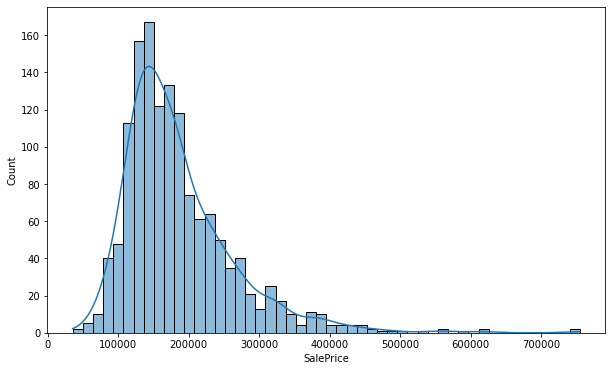

In [11]:
sns.histplot(df.SalePrice, bins=50, kde=True);

There is a right-skewed target varible (SalePrice)

In [12]:
# List skewed variables in df
mask = df.dtypes == np.float
float_cols = df.columns[mask]

# for avove 0.75
skew_limit = 0.75
skew_vals = df[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,24.841008
PoolArea,14.406273
LotArea,12.013038
LowQualFinSF,10.712587
3SsnPorch,10.007116
BsmtFinSF2,4.194649
ScreenPorch,3.987031
EnclosedPorch,3.213038
LotFrontage,2.712348
MasVnrArea,2.601035


In this assignment, I will not transform them with log transformation.

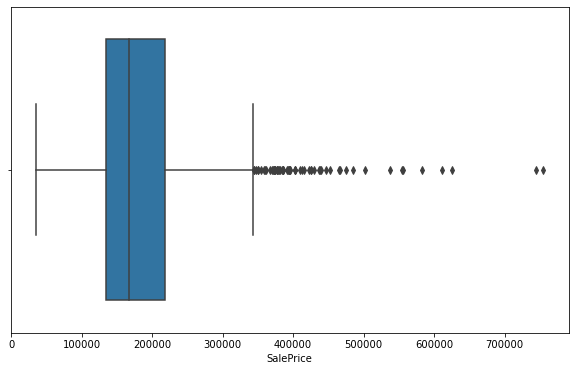

In [13]:
# outliers in SalePrice
sns.boxplot(df.SalePrice);

It seems that there are some outliers in target variable. But I will not remove them.

### Correlation & Multicorrelation

In [14]:
# numeric features
df_numeric = df.select_dtypes(include ="number")
df_numeric

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,2,548.0,2,2003.0,1710.0,1,1,8450.0,65.0,0.0,60,196.0,0.0,2,61.0,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,2,460.0,2,1976.0,1262.0,0,1,9600.0,80.0,0.0,20,0.0,0.0,5,0.0,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,2,608.0,2,2001.0,1786.0,1,1,11250.0,68.0,0.0,60,162.0,0.0,9,42.0,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,1,642.0,3,1998.0,1717.0,0,1,9550.0,60.0,0.0,70,0.0,0.0,2,35.0,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,2,836.0,3,2000.0,2198.0,1,1,14260.0,84.0,0.0,60,350.0,0.0,12,84.0,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,1,2,460.0,2,1999.0,1647.0,1,1,7917.0,62.0,0.0,60,0.0,0.0,8,40.0,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,2,2,500.0,2,1978.0,2073.0,0,1,13175.0,85.0,0.0,20,119.0,0.0,2,0.0,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,2,2,252.0,1,1941.0,2340.0,0,1,9042.0,66.0,0.0,70,0.0,2500.0,5,60.0,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,0,1,240.0,1,1950.0,1078.0,0,1,9717.0,68.0,0.0,20,0.0,0.0,4,0.0,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [15]:
df_numeric.shape
# there are 37 numeric columns including SalePrice

(1379, 37)

In [16]:
# corelation of target variable
corr_SalePrice = df.corr()["SalePrice"].sort_values()[:-1]
corr_SalePrice.round(2)

KitchenAbvGr    -0.14
EnclosedPorch   -0.12
OverallCond     -0.10
MSSubClass      -0.08
YrSold          -0.03
BsmtHalfBath    -0.03
BsmtFinSF2      -0.02
MiscVal         -0.02
LowQualFinSF    -0.01
3SsnPorch        0.04
MoSold           0.04
PoolArea         0.09
ScreenPorch      0.10
BedroomAbvGr     0.16
BsmtUnfSF        0.21
BsmtFullBath     0.23
LotArea          0.25
HalfBath         0.27
LotFrontage      0.28
WoodDeckSF       0.31
2ndFlrSF         0.31
OpenPorchSF      0.33
BsmtFinSF1       0.38
Fireplaces       0.45
MasVnrArea       0.46
GarageYrBlt      0.49
YearRemodAdd     0.51
YearBuilt        0.51
TotRmsAbvGrd     0.54
FullBath         0.56
1stFlrSF         0.59
TotalBsmtSF      0.60
GarageArea       0.61
GarageCars       0.64
GrLivArea        0.71
OverallQual      0.79
Name: SalePrice, dtype: float64

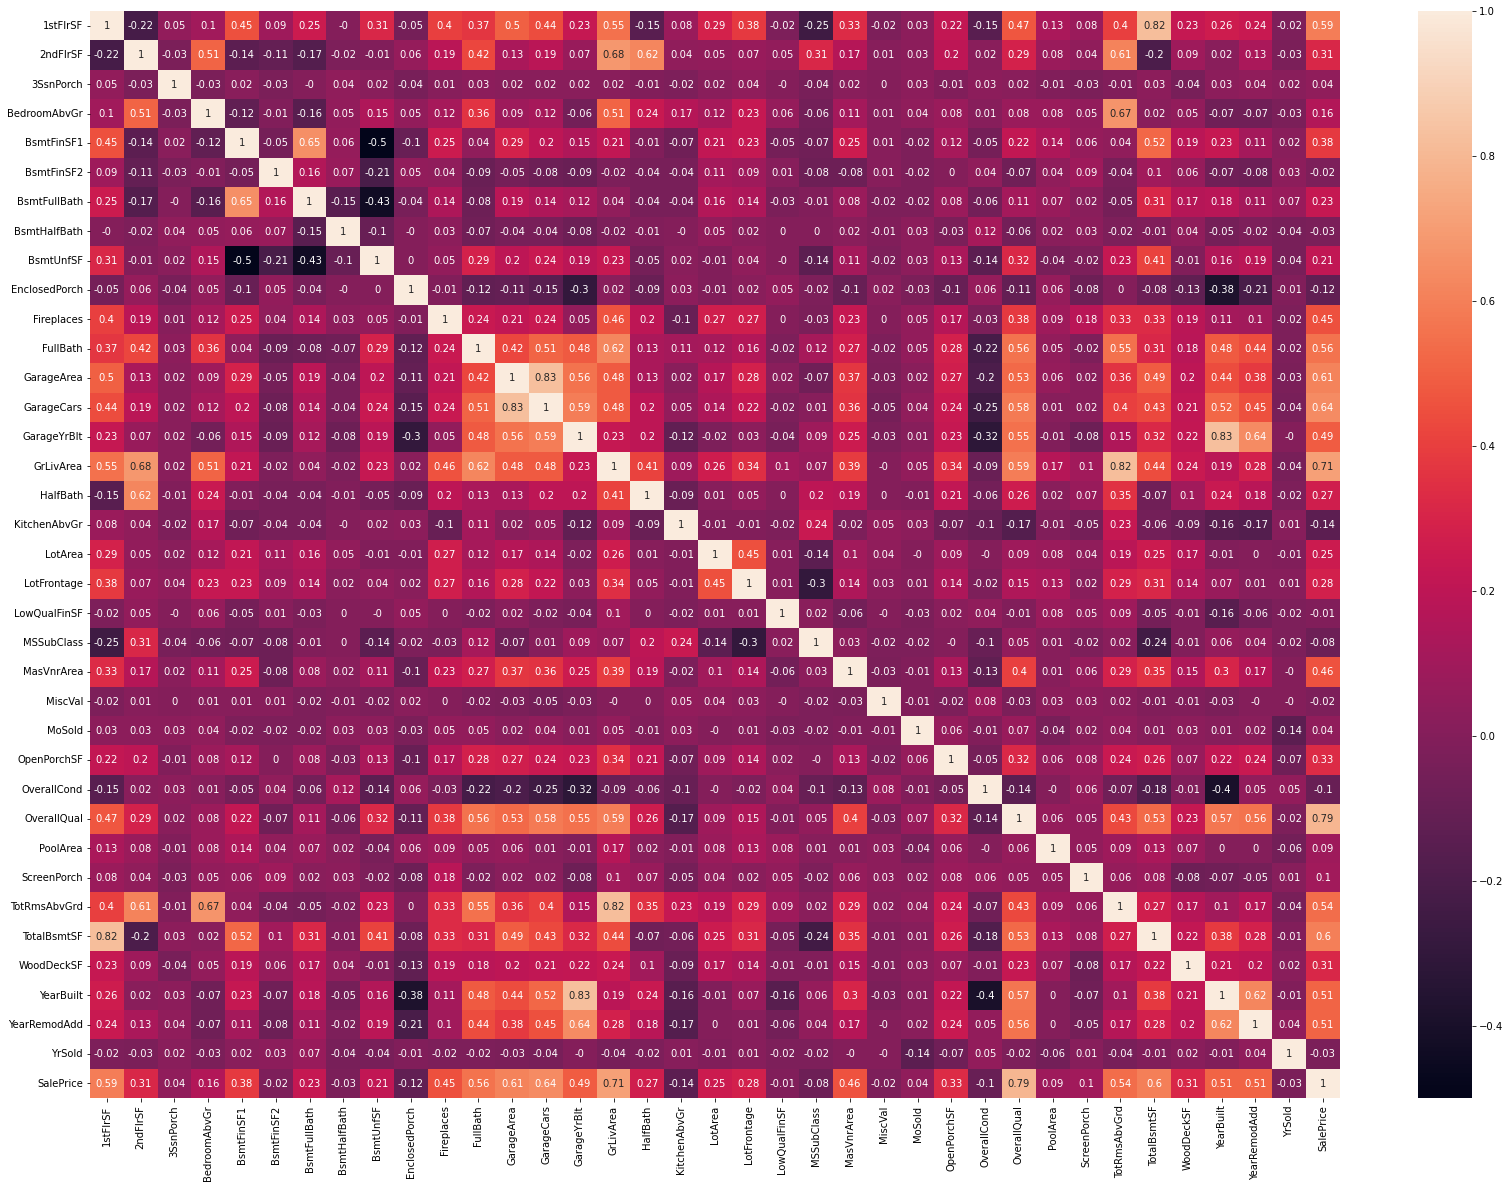

In [17]:
# draw heatmap to see correlation and multicorrelation
fig,ax = plt.subplots(1,1,figsize=(28,20))
sns.heatmap(df_numeric.corr().round(2), annot =True);

In [18]:
# let's look at the correlation of SalePrice for above 0.4
matrix = df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.4].round(2)

print(matrix.SalePrice)

1stFlrSF        0.59
Fireplaces      0.45
FullBath        0.56
GarageArea      0.61
GarageCars      0.64
GarageYrBlt     0.49
GrLivArea       0.71
MasVnrArea      0.46
OverallQual     0.79
TotRmsAbvGrd    0.54
TotalBsmtSF     0.60
YearBuilt       0.51
YearRemodAdd    0.51
SalePrice       1.00
dtype: float64


It seems that "SalePrice" has relatively high correlation with "OverallQual" and "GrLivArea".

In [19]:
# multicollinearity control
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [20]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

There is no multicollinearity problem.

### Get dummies

In [21]:
# before get_dummies, we can copy the original data to call it back if we need
df2 = df.copy()

In [22]:
# object(string) columns
df.select_dtypes(include ="object").head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,None,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


In [23]:
# Select the object (string) columns
mask = df.dtypes == np.object
categorical_cols = df.columns[mask]

# control of categorical variables before get_dummies to see if there is a variable with just one category
num_obj_cols = (df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

print("Number of categorical variables: ", num_obj_cols.shape[0])
print("Number of categories in each variable:\n", num_obj_cols)

Number of categorical variables:  43
Number of categories in each variable:
 Neighborhood     25
Exterior2nd      16
Exterior1st      14
Condition1        9
SaleType          9
RoofMatl          8
HouseStyle        8
Condition2        8
Functional        7
BsmtFinType2      7
GarageType        6
Heating           6
BsmtFinType1      6
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
MiscFeature       5
MSZoning          5
LotConfig         5
BsmtExposure      5
HeatingQC         5
BsmtQual          5
Electrical        5
BldgType          5
GarageCond        5
Fence             5
GarageQual        5
KitchenQual       4
LandContour       4
PoolQC            4
LotShape          4
ExterQual         4
MasVnrType        4
ExterCond         4
BsmtCond          4
Alley             3
PavedDrive        3
LandSlope         3
GarageFinish      3
CentralAir        2
Street            2
Utilities         2
dtype: int64


We have at least two categories for each feature.

In [24]:
# Now we can use get_dummies
df = pd.get_dummies(df, drop_first=True)

In [25]:
# see the new df
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,2,548.0,2,2

In [26]:
# let's see the new shape after get_dummies
df.shape

(1379, 252)

 Before get dummies, we had (1379, 80) shape. With get_dummies, we have (1379, 252). Now I will drop "_None" columns.

In [27]:
# check which columns have "_None" suffix
columns_none = df.filter(regex='_None$',axis=1)
columns_none.sum()

Alley_None           1297
BsmtCond_None         426
BsmtExposure_None     426
BsmtFinType1_None     426
BsmtFinType2_None     427
BsmtQual_None         426
Fence_None           1114
FireplaceQu_None      618
MasVnrType_None       797
MiscFeature_None     1328
PoolQC_None          1372
dtype: int64

In [28]:
# drop these 11 columns.
df = df.drop(columns_none, axis=1)

In [29]:
#check the last shape before Linear Regression
df.shape

(1379, 241)

 After dropping "_None" fetures, now we have (1379, 241) shape.

In [30]:
# check new correlation of target variable with the all variables
corr_Sale_price = df.corr()["SalePrice"].sort_values()[:-1]
corr_Sale_price.round(2)

ExterQual_TA            -0.59
KitchenQual_TA          -0.53
GarageFinish_Unf        -0.48
GarageType_Detchd       -0.41
Foundation_CBlock       -0.35
BsmtQual_TA             -0.33
HeatingQC_TA            -0.33
MSZoning_RM             -0.28
LotShape_Reg            -0.27
SaleType_WD             -0.25
RoofStyle_Gable         -0.22
Neighborhood_NAmes      -0.21
Neighborhood_OldTown    -0.19
Exterior1st_MetalSd     -0.18
Exterior2nd_MetalSd     -0.18
SaleCondition_Normal    -0.17
Neighborhood_Edwards    -0.16
Exterior2nd_Wd Sdng     -0.16
GarageQual_Fa           -0.15
Neighborhood_IDOTRR     -0.15
Exterior1st_Wd Sdng     -0.15
BsmtFinType1_Rec        -0.15
GarageCond_Fa           -0.14
BsmtExposure_No         -0.14
Fence_MnPrv             -0.14
BsmtFinType1_BLQ        -0.14
Neighborhood_Sawyer     -0.14
KitchenAbvGr            -0.14
HeatingQC_Gd            -0.13
Neighborhood_BrkSide    -0.12
EnclosedPorch           -0.12
KitchenQual_Fa          -0.12
Electrical_FuseF        -0.12
Exterior1s

After get_dummies, when we look at correlation of SalePrice with other variables for above absolute 0.5, we see that it has positive correlation with OverallQual, GrLivArea, GarageCars,  GarageArea, TotalBsmtSF, YearRemodAdd, YearBuilt, TotRmsAbvGrd, FullBath, 1stFlrSF and negative correlation with ExterQual_TA and KitchenQual_TA features.

## 2. Train | Test Split

### test_size = 0.2, random_state = 42

In [31]:
# separate predictor from features 
X= df.drop(columns="SalePrice")
y= df.SalePrice

In [32]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1103, 240) (1103,)
Test:  (276, 240) (276,)


## 3. Linear Regression Model

Fit the Linear Regression model and obtain scores

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

In [35]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [36]:
lm_scores = train_val(lm, X_train, y_train, X_test, y_test)
lm_scores

,train,test
R2,9.430950e-01,-2.421444e+09
mae,1.308986e+04,5.597239e+08
mse,3.589679e+08,1.442882e+19
rmse,1.894645e+04,3.798529e+09


Here, we can compare especially r2 and rmse scores in train and test set. Although r2 in train set is high (0.94), it is not meaningful in the test set. Also, we need low rmse scores to decide which model is better. After regularization with Ridge, Lasso and Elastic Net, I will compare all rmse scores.

In [37]:
# This is the Linear Regression scores for the model comparison in the end.
y_pred = lm.predict(X_test)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Linear Regression with Scaling

In [38]:
# For scaling I will use MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [39]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression

lm_scaled=LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# let's see linear scores with scaled data 
lm_scaled_scores = train_val(lm_scaled, X_train_scaled, y_train, X_test_scaled, y_test)
lm_scaled_scores

,train,test
R2,9.430955e-01,-3.045769e+21
mae,1.309279e+04,4.422970e+14
mse,3.589647e+08,1.814903e+31
rmse,1.894636e+04,4.260168e+15


### Cross Validation in Linear Regression

In [42]:
# Linear Regression with Cross Validation
from sklearn.model_selection import cross_validate, cross_val_score
lm_cv = LinearRegression()
lm_cv.fit(X_train_scaled, y_train)

# cross validation with scaled data
scores = cross_validate(lm_cv, X_train_scaled, y_train, scoring = ['r2', 
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 10)

In [43]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.028494,0.0,-2.975867e-01,-2.892468e+04,-7.011560e+09,-8.373506e+04
1,0.044493,0.0,-4.891182e+18,-3.260125e+13,-4.441454e+28,-2.107476e+14
2,0.033329,0.0,-2.952962e+21,-3.318208e+14,-1.222166e+31,-3.495949e+15
3,0.037516,0.0,-3.498605e+20,-3.049800e+14,-3.033223e+30,-1.741615e+15
4,0.034065,0.0,2.004708e-01,-2.467179e+04,-4.828681e+09,-6.948871e+04
5,0.046864,0.0,1.427591e-01,-2.710501e+04,-7.248384e+09,-8.513744e+04
6,0.031241,0.0,-1.085392e+00,-2.890915e+04,-1.018673e+10,-1.009294e+05
7,0.050755,0.0,-7.062496e+17,-6.354015e+12,-2.712176e+27,-5.207856e+13
8,0.031250,0.0,-1.841352e+20,-1.641746e+14,-1.121774e+30,-1.059138e+15
9,0.031243,0.0,-5.795071e+17,-5.577134e+12,-3.421487e+27,-5.849348e+13


In [44]:
# Let's look at Linear Regression test scores with cross validation
lm_cv_scores = pd.DataFrame(scores).iloc[:, 2:].mean()
lm_cv_scores

test_r2                            -3.493135e+20
test_neg_mean_absolute_error       -8.455078e+13
test_neg_mean_squared_error        -1.642720e+30
test_neg_root_mean_squared_error   -6.618022e+14
dtype: float64

Overall, we could not get good test scores for Ames Housing data through Linear Regression model. Now I will apply regularization with Ridge, Lasso and Elastic Net, then compare all models.

In [45]:
#  To see Linear Regression scores with Cross Validation in the end of the analysis... 
y_pred = lm_cv.predict(X_test_scaled)
lm_cv_R2 = r2_score(y_test, y_pred)
lm_cv_mae = mean_absolute_error(y_test, y_pred)
lm_cv_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 4. Ridge, Lasso and Elastic Net

## 4.a) Ridge Regression

In [46]:
from sklearn.linear_model import Ridge, RidgeCV
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [47]:
# Scores with Ridge Regression
ridge_scores = train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)
ridge_scores

,train,test
R2,9.163817e-01,8.086729e-01
mae,1.506412e+04,1.969938e+04
mse,5.274805e+08,1.140074e+09
rmse,2.296694e+04,3.376498e+04


Comparing with Linear Regression, we have better scores in Ridge Regression. 

### Finding best alpha for Ridge (GridSearchCV)

In [48]:
# For this purpose I will use GridSearchCV
from sklearn.model_selection import GridSearchCV

In [49]:
alpha_space = np.linspace(0.001, 500, 500)

ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [50]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.00300200e+00, 2.00500401e+00, 3.00700601e+00,
       4.00900802e+00, 5.01101002e+00, 6.01301202e+00, 7.01501403e+00,
       8.01701603e+00, 9.01901804e+00, 1.00210200e+01, 1.10230220e+01,
       1.20250240e+01, 1.30270261e+01, 1.40290281e+01, 1.50310301e+01,
       1.60330321e+01, 1.7035...
       4.76953954e+02, 4.77955956e+02, 4.78957958e+02, 4.79959960e+02,
       4.80961962e+02, 4.81963964e+02, 4.82965966e+02, 4.83967968e+02,
       4.84969970e+02, 4.85971972e+02, 4.86973974e+02, 4.87975976e+02,
       4.88977978e+02, 4.89979980e+02, 4.90981982e+02, 4.91983984e+02,
       4.92985986e+02, 4.93987988e+02, 4.94989990e+02, 4.95991992e+02,
       4.96993994e+02, 4.97995996e+02, 4.98997998e+02, 5.00000000e+02])},
             scoring='neg_root_mean_squared_error')

In [51]:
# let's see the best alpha value and the best neg_rmse score for Ridge
print(ridge_grid_model.best_params_, ridge_grid_model.best_score_)

{'alpha': 7.015014028056112} -30425.4704028435


In [52]:
# Ridge scores with GridSearchCV
ridge_grid_scores = train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
ridge_grid_scores

,train,test
R2,8.934132e-01,8.273678e-01
mae,1.602759e+04,1.931371e+04
mse,6.723699e+08,1.028675e+09
rmse,2.593010e+04,3.207297e+04


When we compare Ridge Regression scores with (above) and without (below) GridSearchCV, we see that Ridge with GridSearchCV gives better r2 and rmse scores in the test set.

In [53]:
# Let's remember Ridge Scores without GridSearchCV
ridge_scores

,train,test
R2,9.163817e-01,8.086729e-01
mae,1.506412e+04,1.969938e+04
mse,5.274805e+08,1.140074e+09
rmse,2.296694e+04,3.376498e+04


In [54]:
# Ridge scores with GridSearchCV for the comparison in the end:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [55]:
# Coef values with the best alpha in Ridge
ridge = Ridge(alpha=7.015, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
KitchenQual_Gd,-28806.408895
KitchenQual_TA,-28364.237257
PoolQC_Gd,-26455.767220
BsmtQual_Gd,-22424.445478
BsmtQual_TA,-19326.825706
KitchenQual_Fa,-19103.038143
MSSubClass,-18478.146538
ExterQual_TA,-16708.364396
KitchenAbvGr,-15334.584747
LotShape_IR3,-15042.873744


## 4.b. Lasso Regression

In [56]:
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [57]:
lasso_scores = train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
lasso_scores

,train,test
R2,9.430085e-01,4.584085e-01
mae,1.311732e+04,2.175547e+04
mse,3.595130e+08,3.227218e+09
rmse,1.896083e+04,5.680861e+04


### Finding best alpha for Lasso (GridSearchCV)

In [58]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [59]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.00300200e+00, 2.00500401e+00, 3.00700601e+00,
       4.00900802e+00, 5.01101002e+00, 6.01301202e+00, 7.01501403e+00,
       8.01701603e+00, 9.01901804e+00, 1.00210200e+01, 1.10230220e+01,
       1.20250240e+01, 1.30270261e+01, 1.40290281e+01, 1.50310301e+01,
       1.60330321e+01, 1.7035...
       4.76953954e+02, 4.77955956e+02, 4.78957958e+02, 4.79959960e+02,
       4.80961962e+02, 4.81963964e+02, 4.82965966e+02, 4.83967968e+02,
       4.84969970e+02, 4.85971972e+02, 4.86973974e+02, 4.87975976e+02,
       4.88977978e+02, 4.89979980e+02, 4.90981982e+02, 4.91983984e+02,
       4.92985986e+02, 4.93987988e+02, 4.94989990e+02, 4.95991992e+02,
       4.96993994e+02, 4.97995996e+02, 4.98997998e+02, 5.00000000e+02])},
             scoring='neg_root_mean_squared_error')

In [60]:
# Lasso with the best alpha value and neg_rmse score
print(lasso_grid_model.best_params_, lasso_grid_model.best_score_ )

{'alpha': 334.6696693386773} -31358.188831085776


In [61]:
lasso_grid_scores = train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
lasso_grid_scores

,train,test
R2,8.642310e-01,8.198809e-01
mae,1.783697e+04,1.940189e+04
mse,8.564567e+08,1.073288e+09
rmse,2.926528e+04,3.276108e+04


In [62]:
# To compare it with Ridge with GridSearchCV 
ridge_grid_scores

,train,test
R2,8.934132e-01,8.273678e-01
mae,1.602759e+04,1.931371e+04
mse,6.723699e+08,1.028675e+09
rmse,2.593010e+04,3.207297e+04


To compare scores with GridSearchCV, Ridge gives better r2 and rmse scores. However, we also need to consider feature importance. Lasso gives these scores by using less features.

In [63]:
# coefficient with the best alpha in Lasso
lasso = Lasso(alpha=334.6, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
MSSubClass,-28592.928529
KitchenQual_Gd,-25880.046771
KitchenQual_TA,-25335.040180
BsmtQual_Gd,-8793.757513
ExterQual_TA,-7995.966538
KitchenQual_Fa,-7213.464400
RoofStyle_Gable,-5166.838126
BsmtQual_TA,-5107.185294
MSZoning_RM,-4361.264625
GarageFinish_Unf,-3668.581010


In [64]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 60 variables and eliminated the other 180 variables


Lasso punished severely and eliminated 180 variables. Now we have just 60 features.

In [65]:
#Lasso scores with GridSearchCV for comparison in the end
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 4.c. Elastic-Net

In [66]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [67]:
# Let's see ElasticNet scores
en_scores = train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)
en_scores

,train,test
R2,6.012587e-01,6.682170e-01
mae,3.098355e+04,2.930583e+04
mse,2.515337e+09,1.977018e+09
rmse,5.015313e+04,4.446367e+04


### Finding best alpha and l1_ratio for Elastic-Net (GridSearchCV)

In [68]:
elastic_model = ElasticNet(random_state=42)

In [69]:
# Considering the best alphas for Ridge and Lasso...
param_grid = {'alpha':[0.01, 0.1, 1, 5, 8, 9, 10, 50, 100, 264, 265, 280, 300],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [70]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 8, 9, 10, 50, 100, 264, 265,
                                   280, 300],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [71]:
print(elastic_grid_model.best_params_, elastic_grid_model.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.1} -30449.566845695266


In [72]:
# let's look at the elastic-net scores with GridSearchCV
en_grid_scores = train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
en_grid_scores

,train,test
R2,8.871399e-01,8.285602e-01
mae,1.632777e+04,1.929255e+04
mse,7.119428e+08,1.021570e+09
rmse,2.668226e+04,3.196201e+04


In [73]:
# To compare it with Ridge GridSearchCV scores...
ridge_grid_scores

,train,test
R2,8.934132e-01,8.273678e-01
mae,1.602759e+04,1.931371e+04
mse,6.723699e+08,1.028675e+09
rmse,2.593010e+04,3.207297e+04


In [74]:
# ElasticNet scores with GridSearchCV for comparision in the end
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Comparison and Conclusion

### Feature Importance

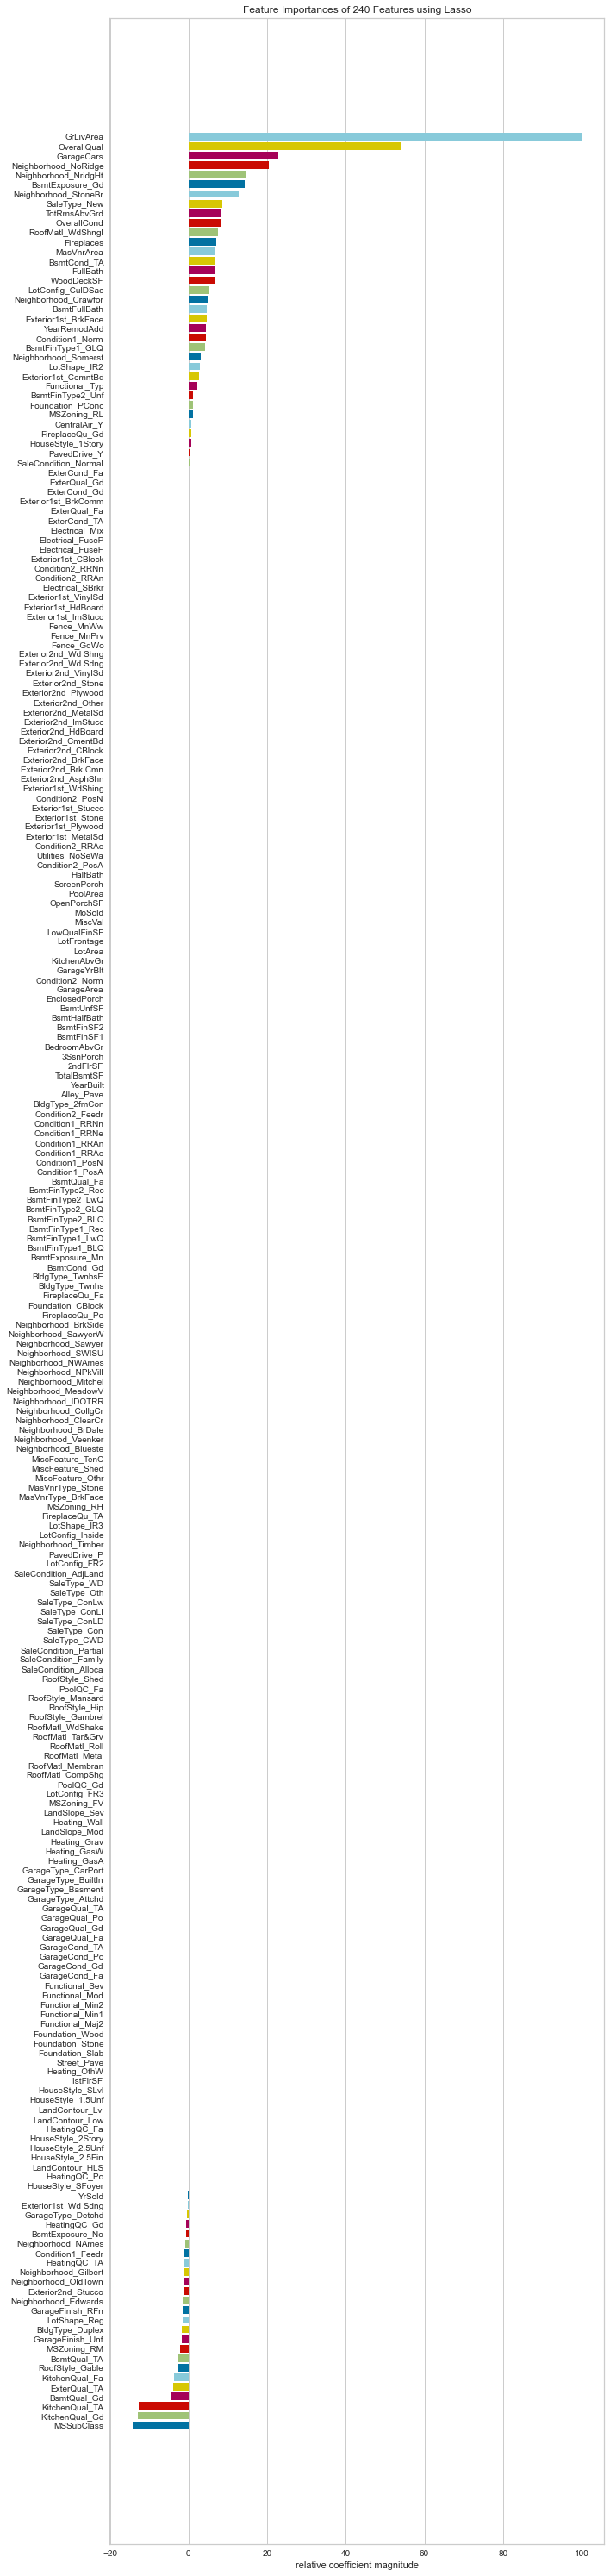

In [75]:
# feature importance for the best alpha value of Lasso
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha= 334.6), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

### Comparison of scores in Linear Regression, Ridge, Lasso and ElasticNet

In [76]:
# let's compare all models in terms of r2, mae and rmse scores
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "linear_cv_m": {"r2_score": lm_cv_R2 , 
 "mae": lm_cv_mae, 
 "rmse":lm_cv_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,-2.421444e+09,5.597239e+08,3.798529e+09
linear_cv_m,-3.045769e+21,4.422970e+14,4.260168e+15
ridge_m,8.273678e-01,1.931371e+04,3.207297e+04
lasso_m,8.198809e-01,1.940189e+04,3.276108e+04
elastic_m,8.285602e-01,1.929255e+04,3.196201e+04


### Conclusion

1-According to the feature importance graph in Lasso, among other features, SalePrice has positive correlation especially with GrLivArea, OverallQual, GarageCars and Neighborhood_NoRidge. On the other hand, it has negative correlation with MSSubClass, KitchenQual_Gd and KitchenQual_TA.

2-In the comparison table, I have shown scores for Linear Regression, Linear Regression with Cross Validation, Ridge with GridSearchCV, Lasso with GridSearchCV and Elastic Net with GridSearchCV. As seen from the table, Ridge and ElasticNet give better scores than Lasso. We acheived the best scores with Elastic Net although its scores are very close to Ridge's. On the other hand, Linear Regression gives the worst scores. The high number of categorical variables (especially with very low correlation) could be a reason to have such scores in the Linear Regression. One way to solve this problem might be to remove some insignificant features as Lasso does. As a result, in terms of scores, one can choose Elastic Net and Ridge, but in terms of feature importance, Lasso has some advantages since it achieves similar scores with both of them by using less features.

3-After eliminating less relevant or irrelavent features and selecting important ones as included in Lasso, one might repeat this process from the beginning to see if there would be any change in scores according to models. Then creating a list of features with outside values, a prediction on sale price can be made. 